# **Diabetes Prediction Using Machine Learning**

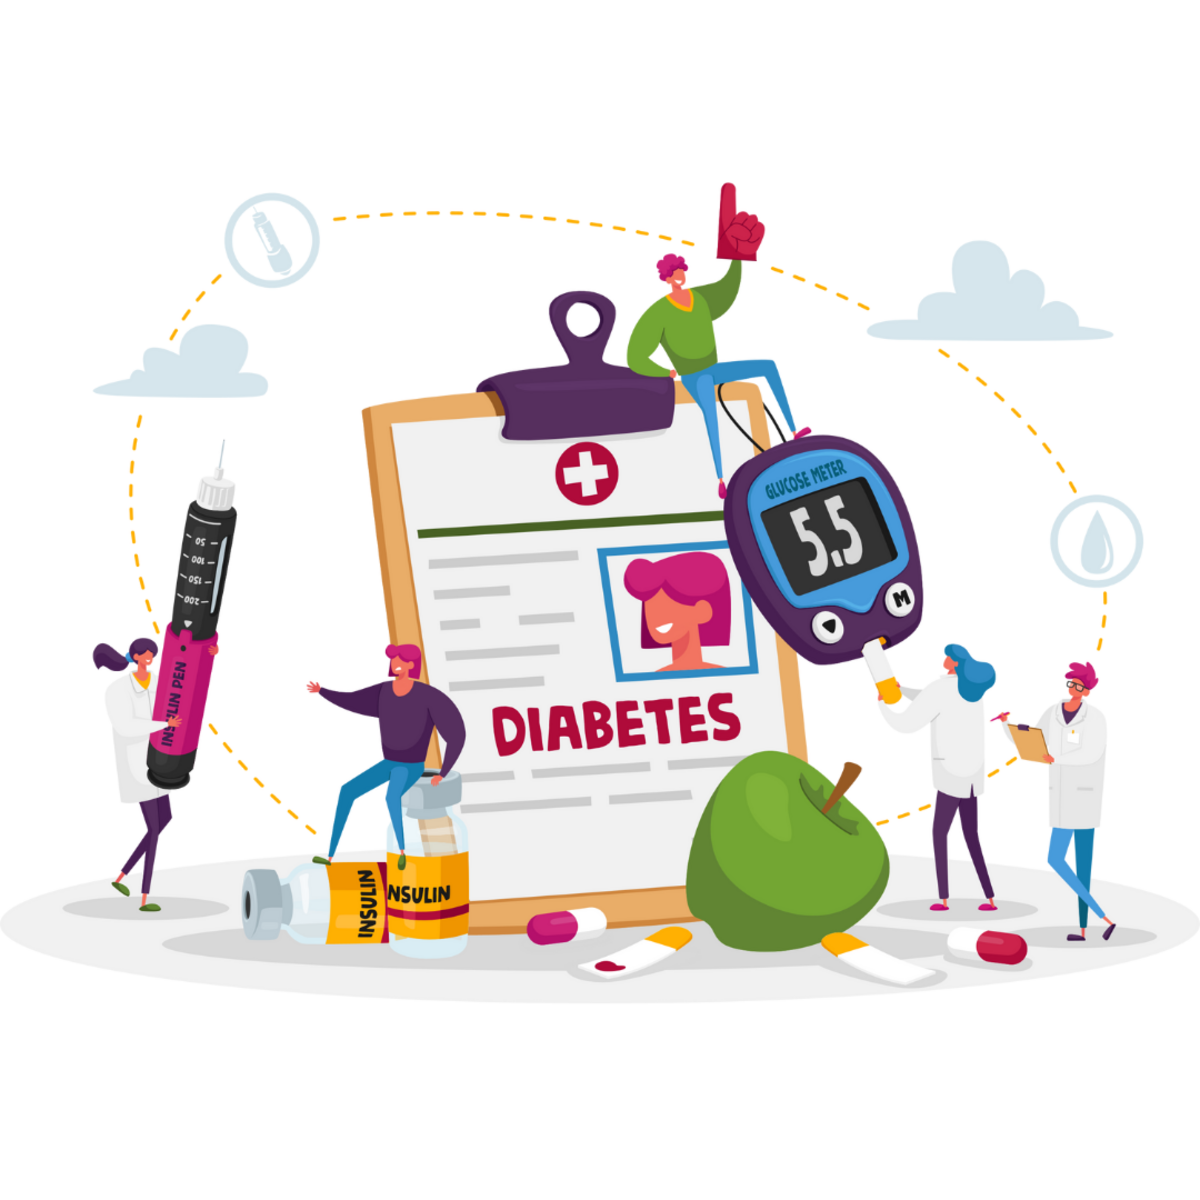



# **ABOUT DATASET**

This dataset is originally from the National Institute of Diabetes and Digestive
and Kidney Diseases. The objective of the dataset is to diagnostically predict
whether a patient has diabetes based on certain diagnostic measurements
included in the dataset. Several constraints were placed on the selection of
these instances from a larger database. In particular, all patients here are
females at least 21 years old of Pima Indian heritage.

# **Objective**

The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# **Importance in Today's world:**


Diabetes prediction is vital today for early intervention, reduced healthcare costs, and improved quality of life. Predictive tools help identify high-risk individuals and tailor prevention strategies, making a significant impact on public health.

In [843]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [844]:
os.listdir()   # Use os.listdir() to retrieve a list of filenames in the specified directory.

['.config', 'diabetes.csv', 'cleaned dataset', 'sample_data']

In [845]:
df=pd.read_csv('diabetes.csv')    # read the dataset.

# **Data Preprocessing**

## Understanding and Manupulating Data Set

In [846]:
df.head()   # returns first n rows.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [847]:
df.tail()      # returns last n rows.

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [848]:
df.shape   # check shape of dataset

(768, 9)

In [849]:
df.size     # check size of dataset

6912

In [850]:
df.ndim   # check dimension of dataset

2

In [851]:
df.columns  # check columns in dataset.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [852]:
df.info()   # Print a concise summary of a DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [853]:
df.duplicated().sum()   #  Check data have duplicate values or no.

0

In [854]:
df.isnull().sum()   # check missing values in DataFrame.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [855]:
df.dtypes  # check datatypes of every columns.

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [856]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [857]:
for i in df:
  print(i)
  print(df[i])
  print('--'* 20)


Pregnancies
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64
----------------------------------------
Glucose
0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64
----------------------------------------
BloodPressure
0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64
----------------------------------------
SkinThickness
0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64
----------------------------------------
Insulin
0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, 

**Observations:**
- There are a total of 768 records and 9 features in the dataset.
- Each feature can be either of integer or float dataype.
- Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
- There are zero NaN values in the dataset.
- In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

In [858]:
# Save the DataFrame 'df' to a CSV file named 'Cleaned_dataset'

df.to_csv('cleaned dataset')

# **EDA** - Exploratory Data Analysis

##**Data Visualization**

In [859]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

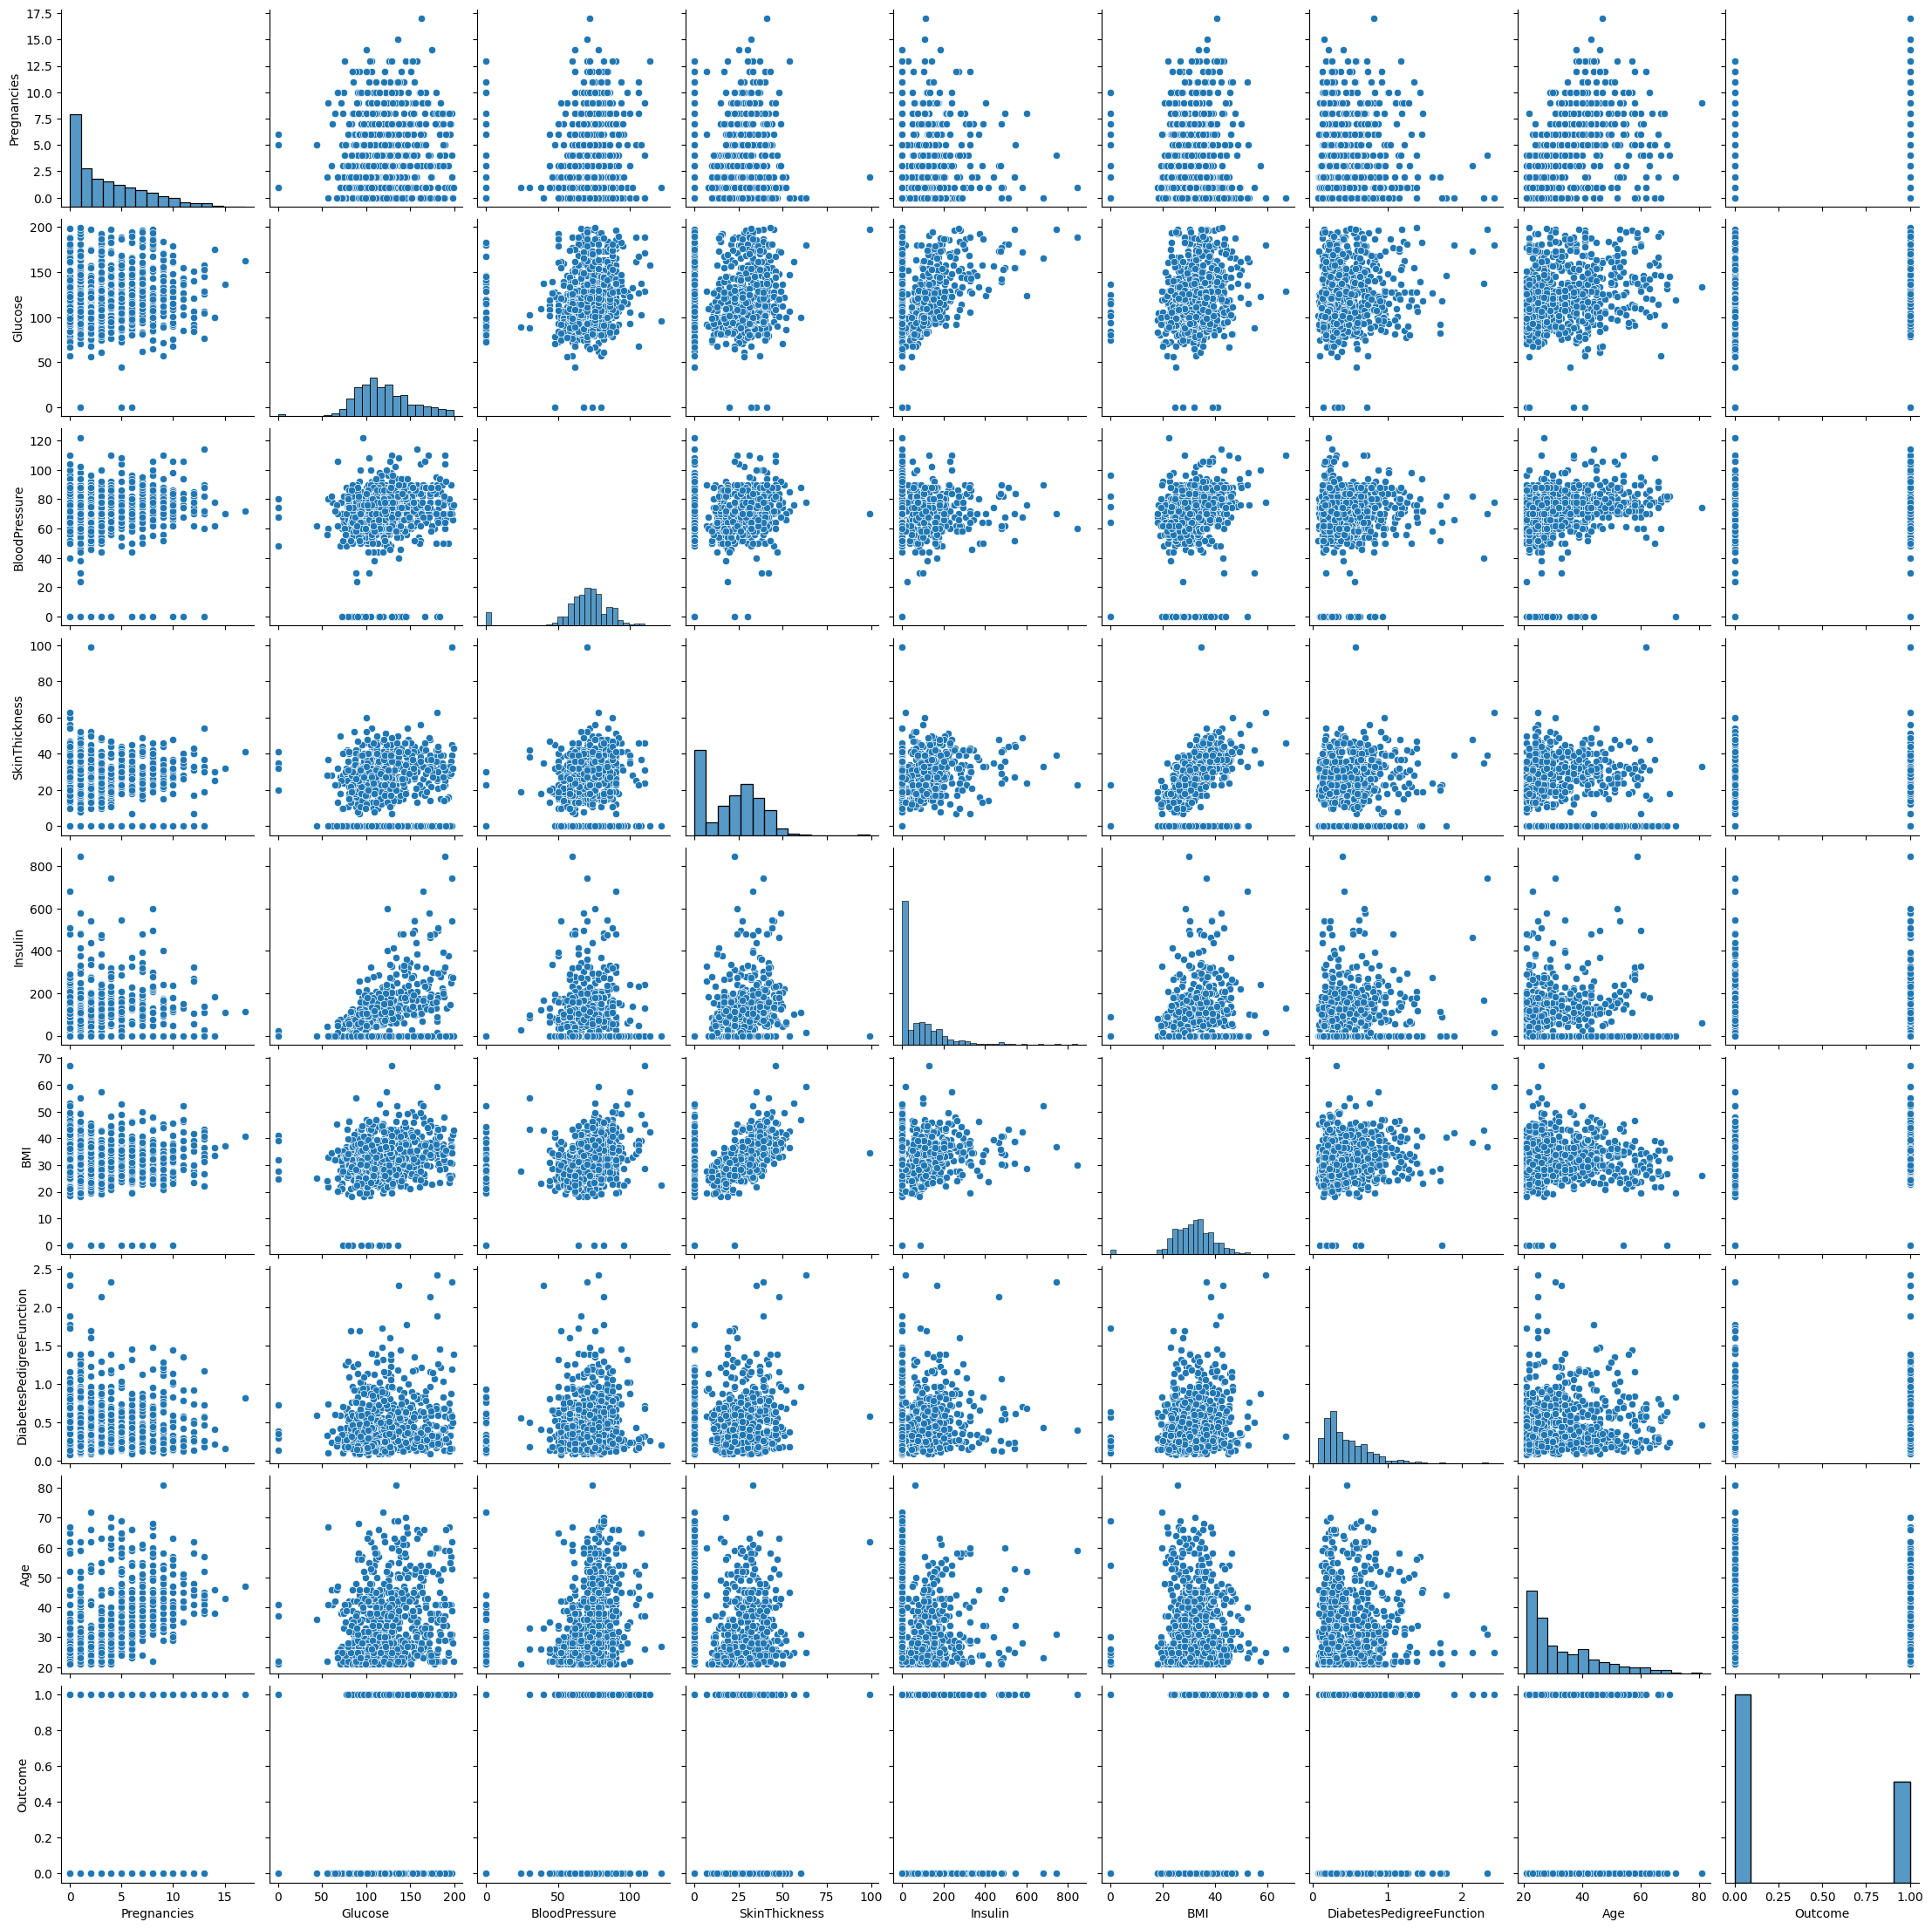

In [860]:
sns.pairplot(df)

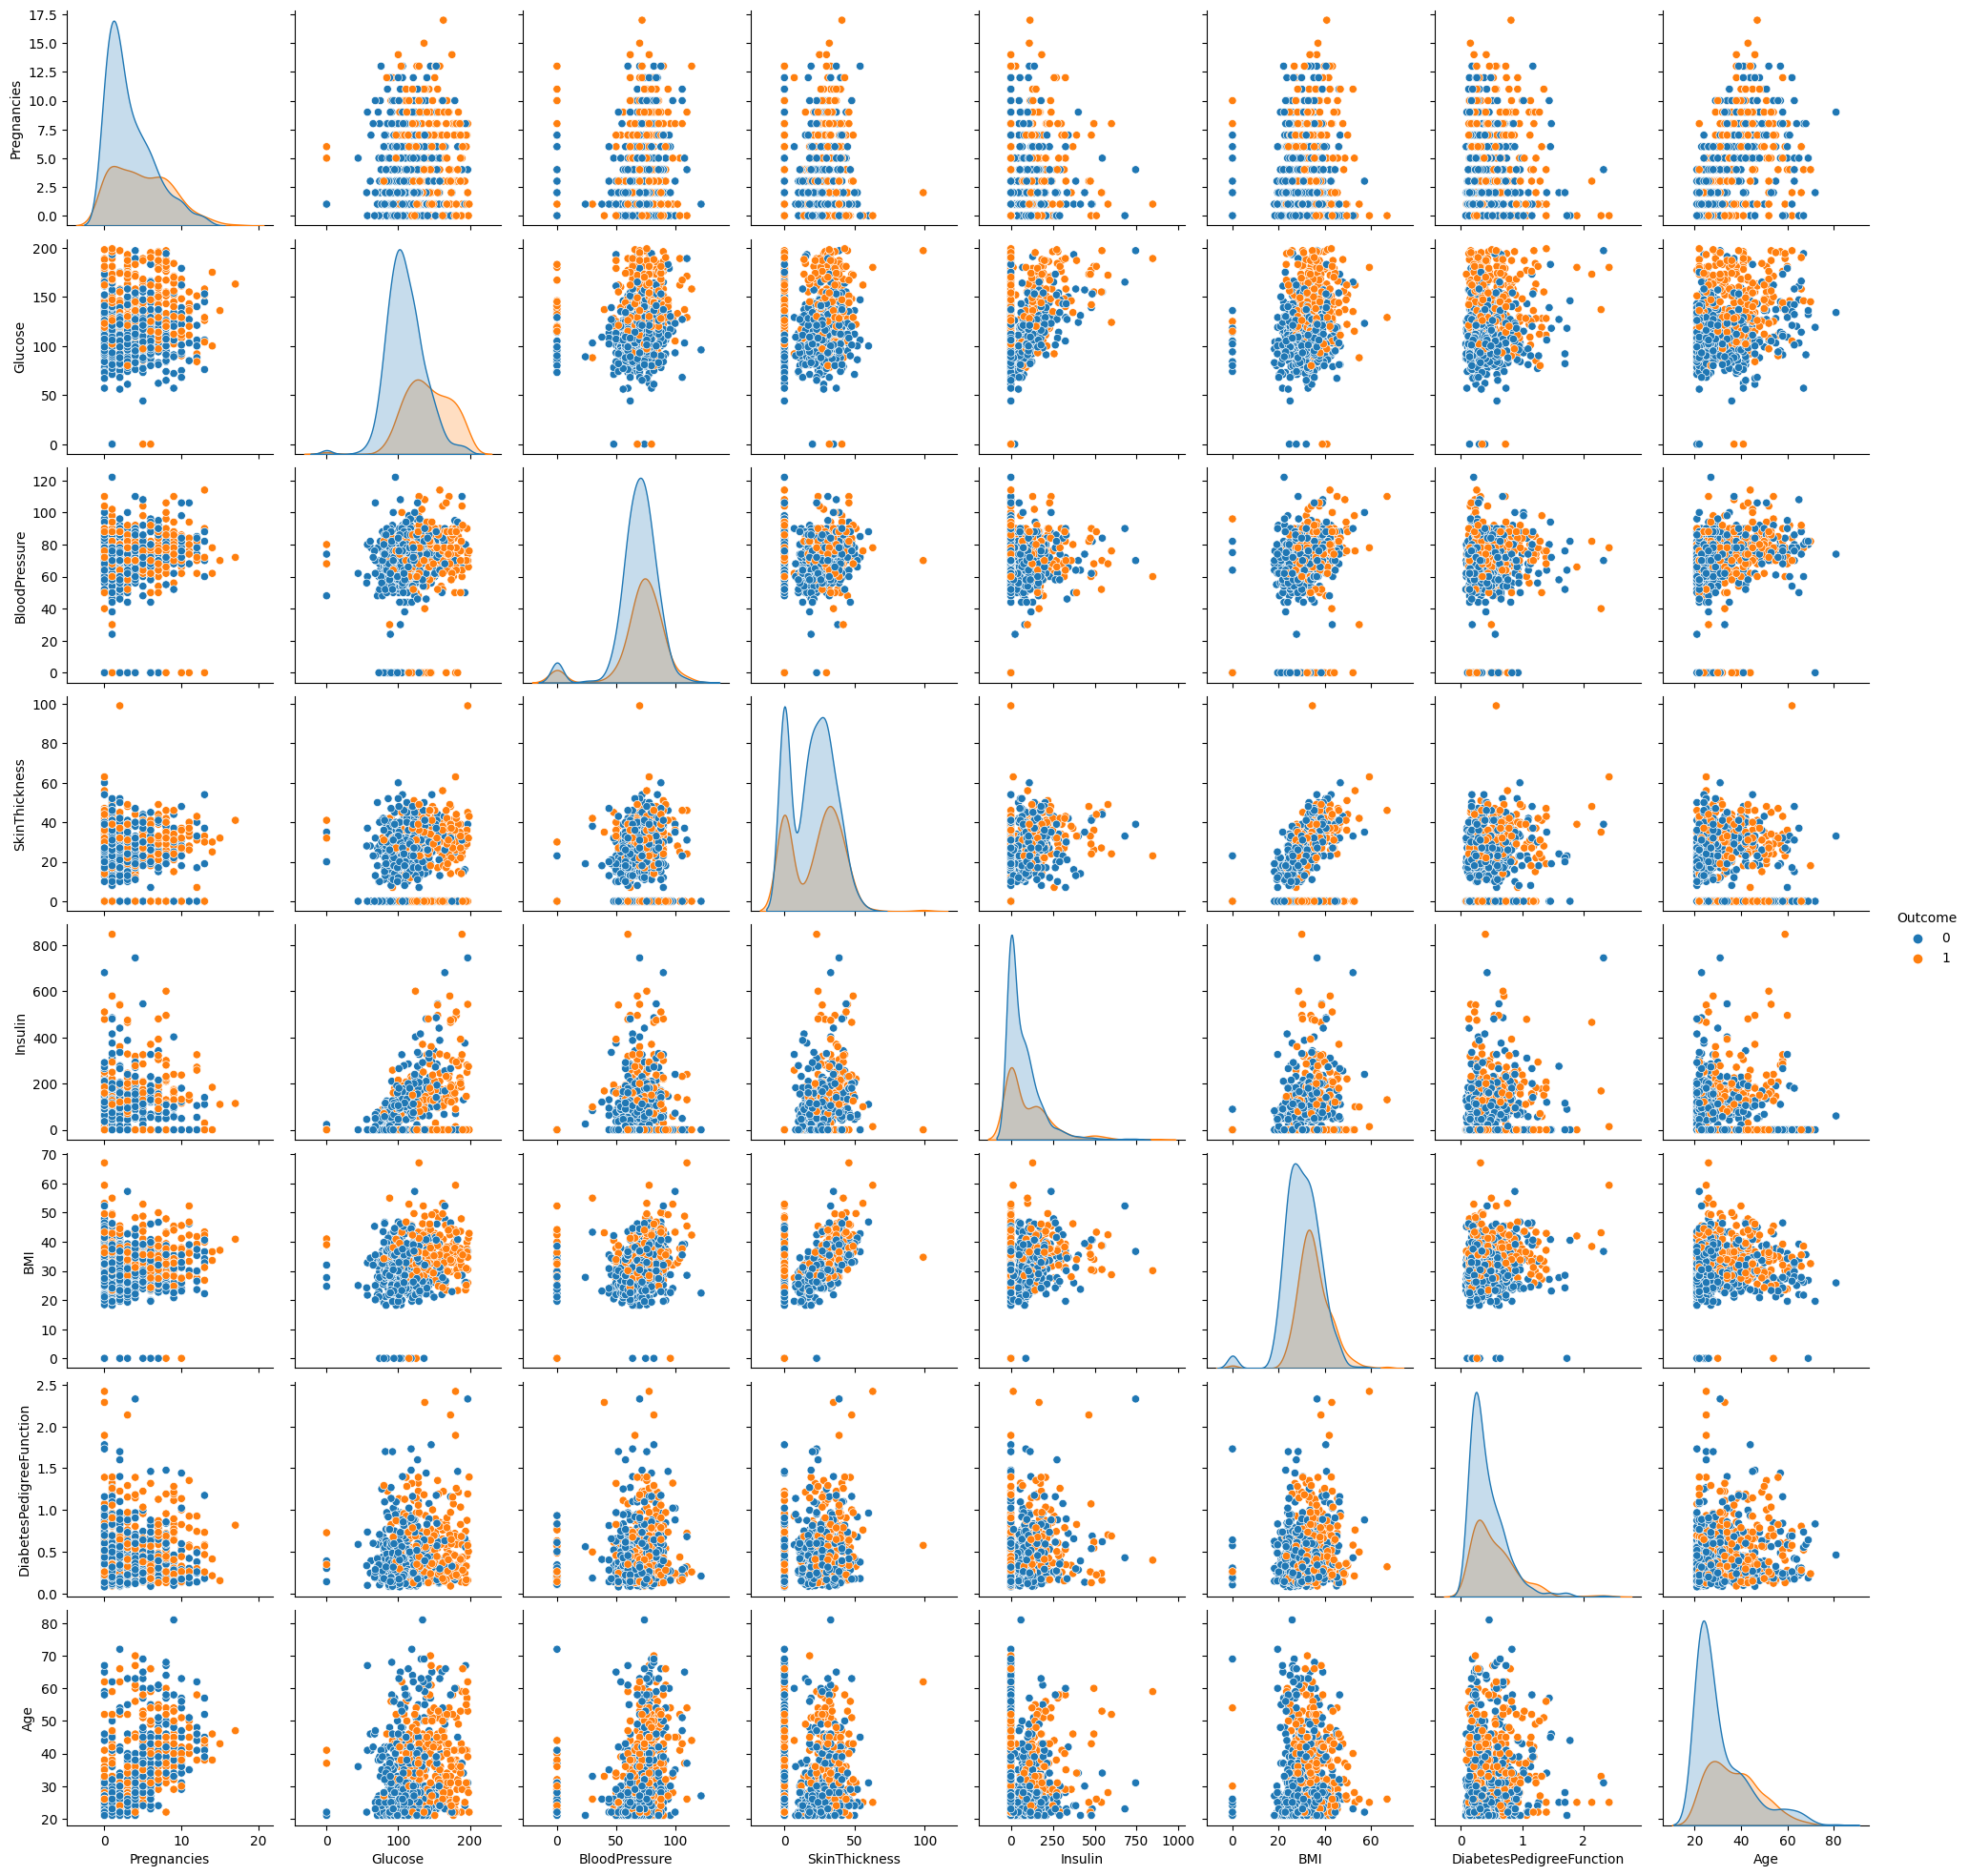

In [861]:
sns.pairplot(df,hue ='Outcome')

In [862]:
Outcome_value_counts = df['Outcome'].value_counts()
Outcome_value_counts


0    500
1    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

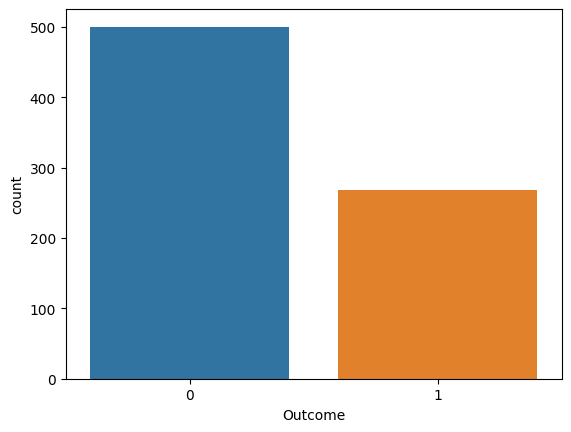

In [863]:
sns.countplot(x='Outcome',data=df)

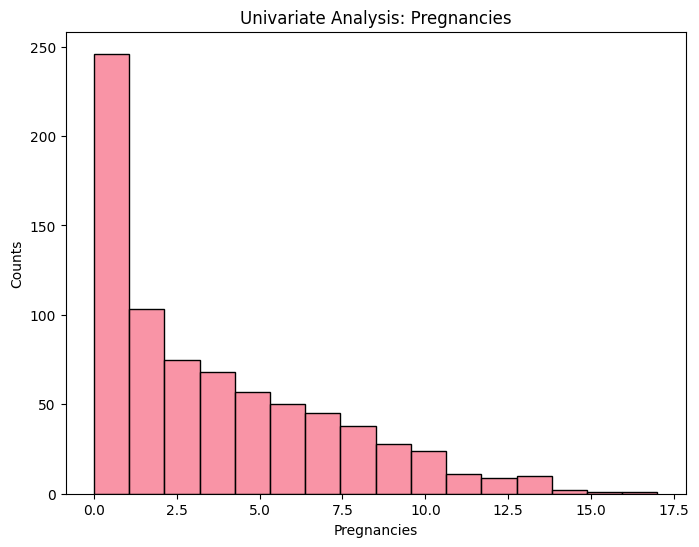

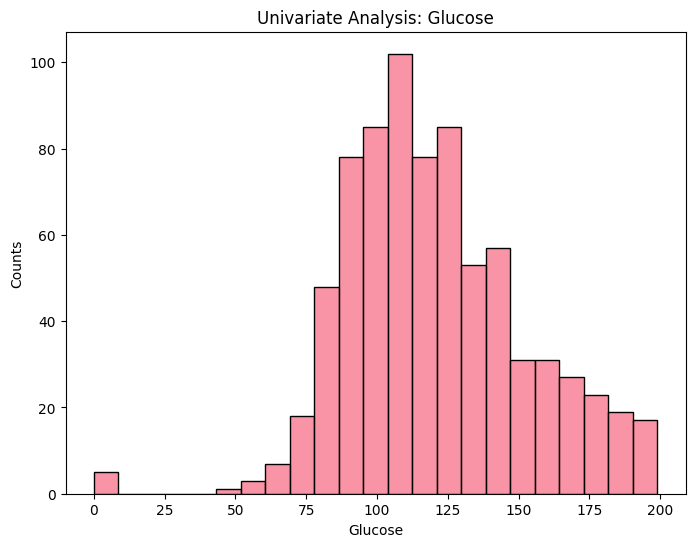

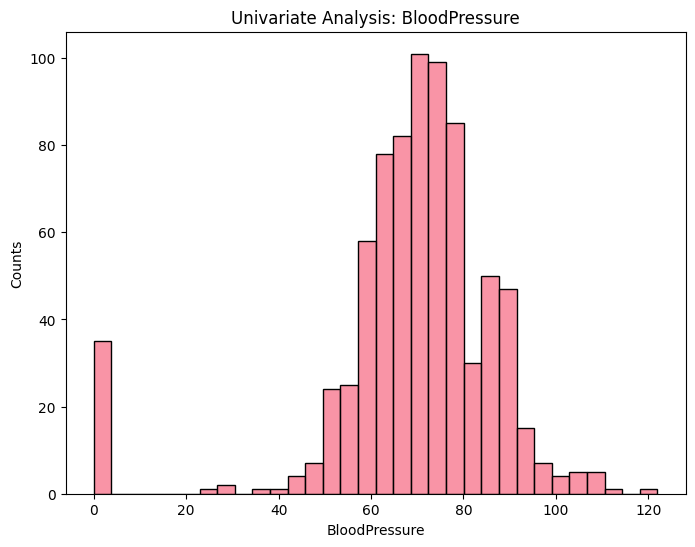

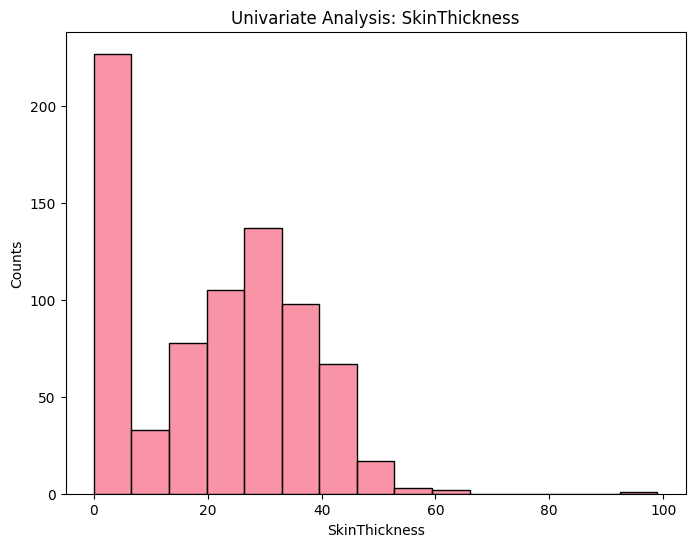

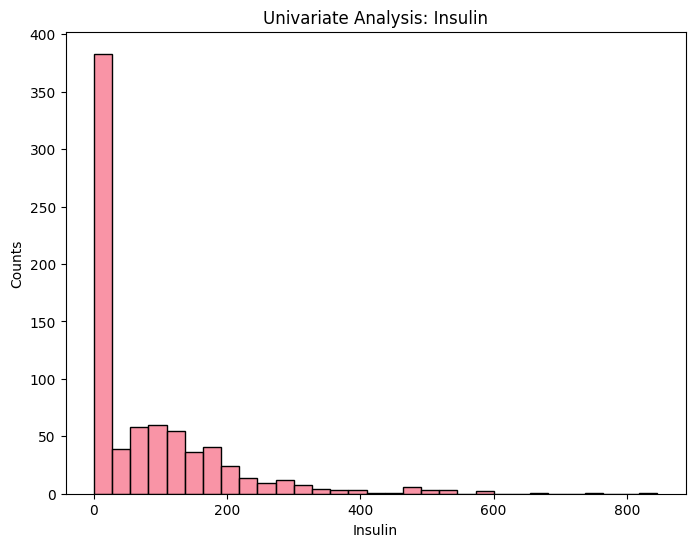

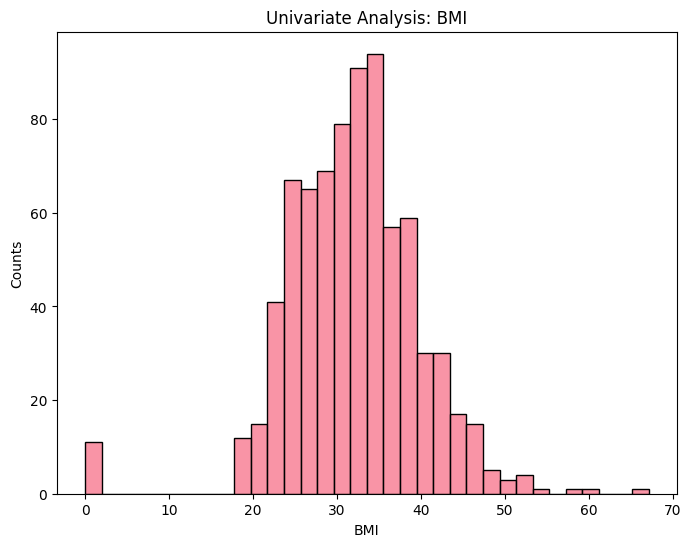

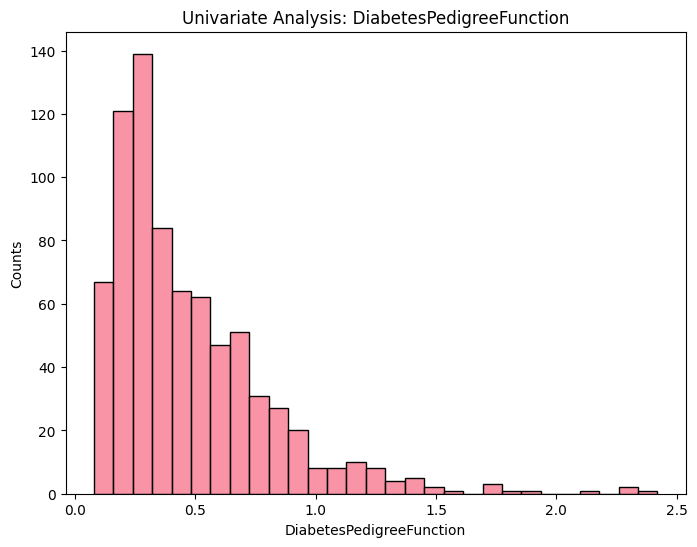

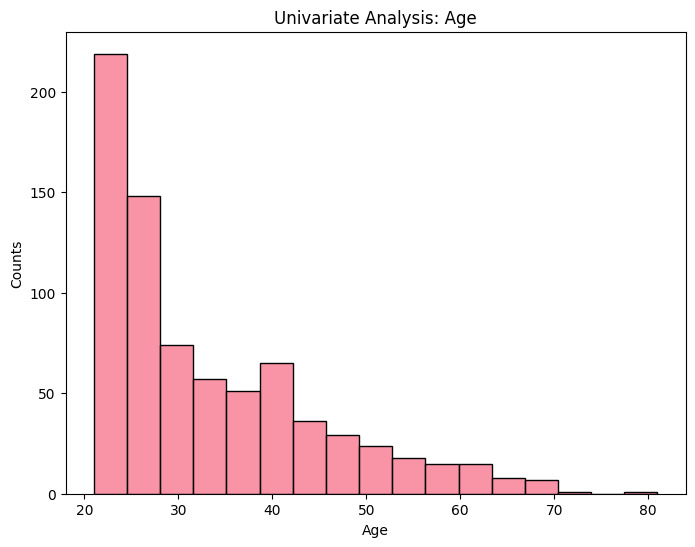

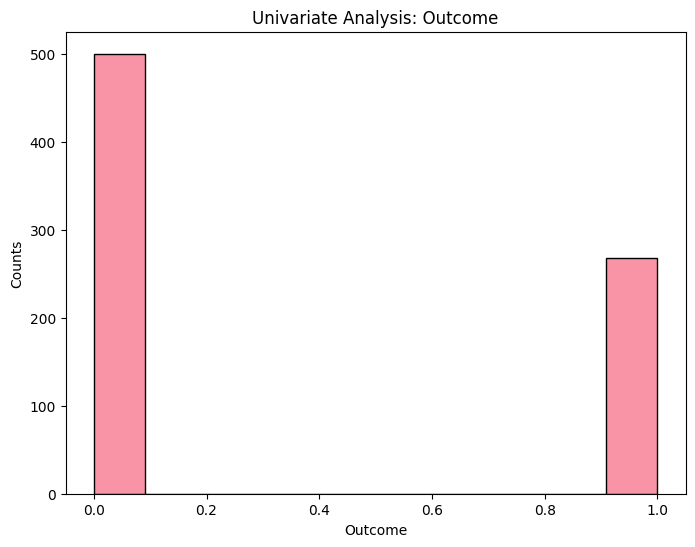

In [864]:
for i in df.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df[i],color=sns.color_palette('husl')[0])
  plt.xlabel(i)
  plt.ylabel('Counts')
  plt.title(f'Univariate Analysis: {i}')

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

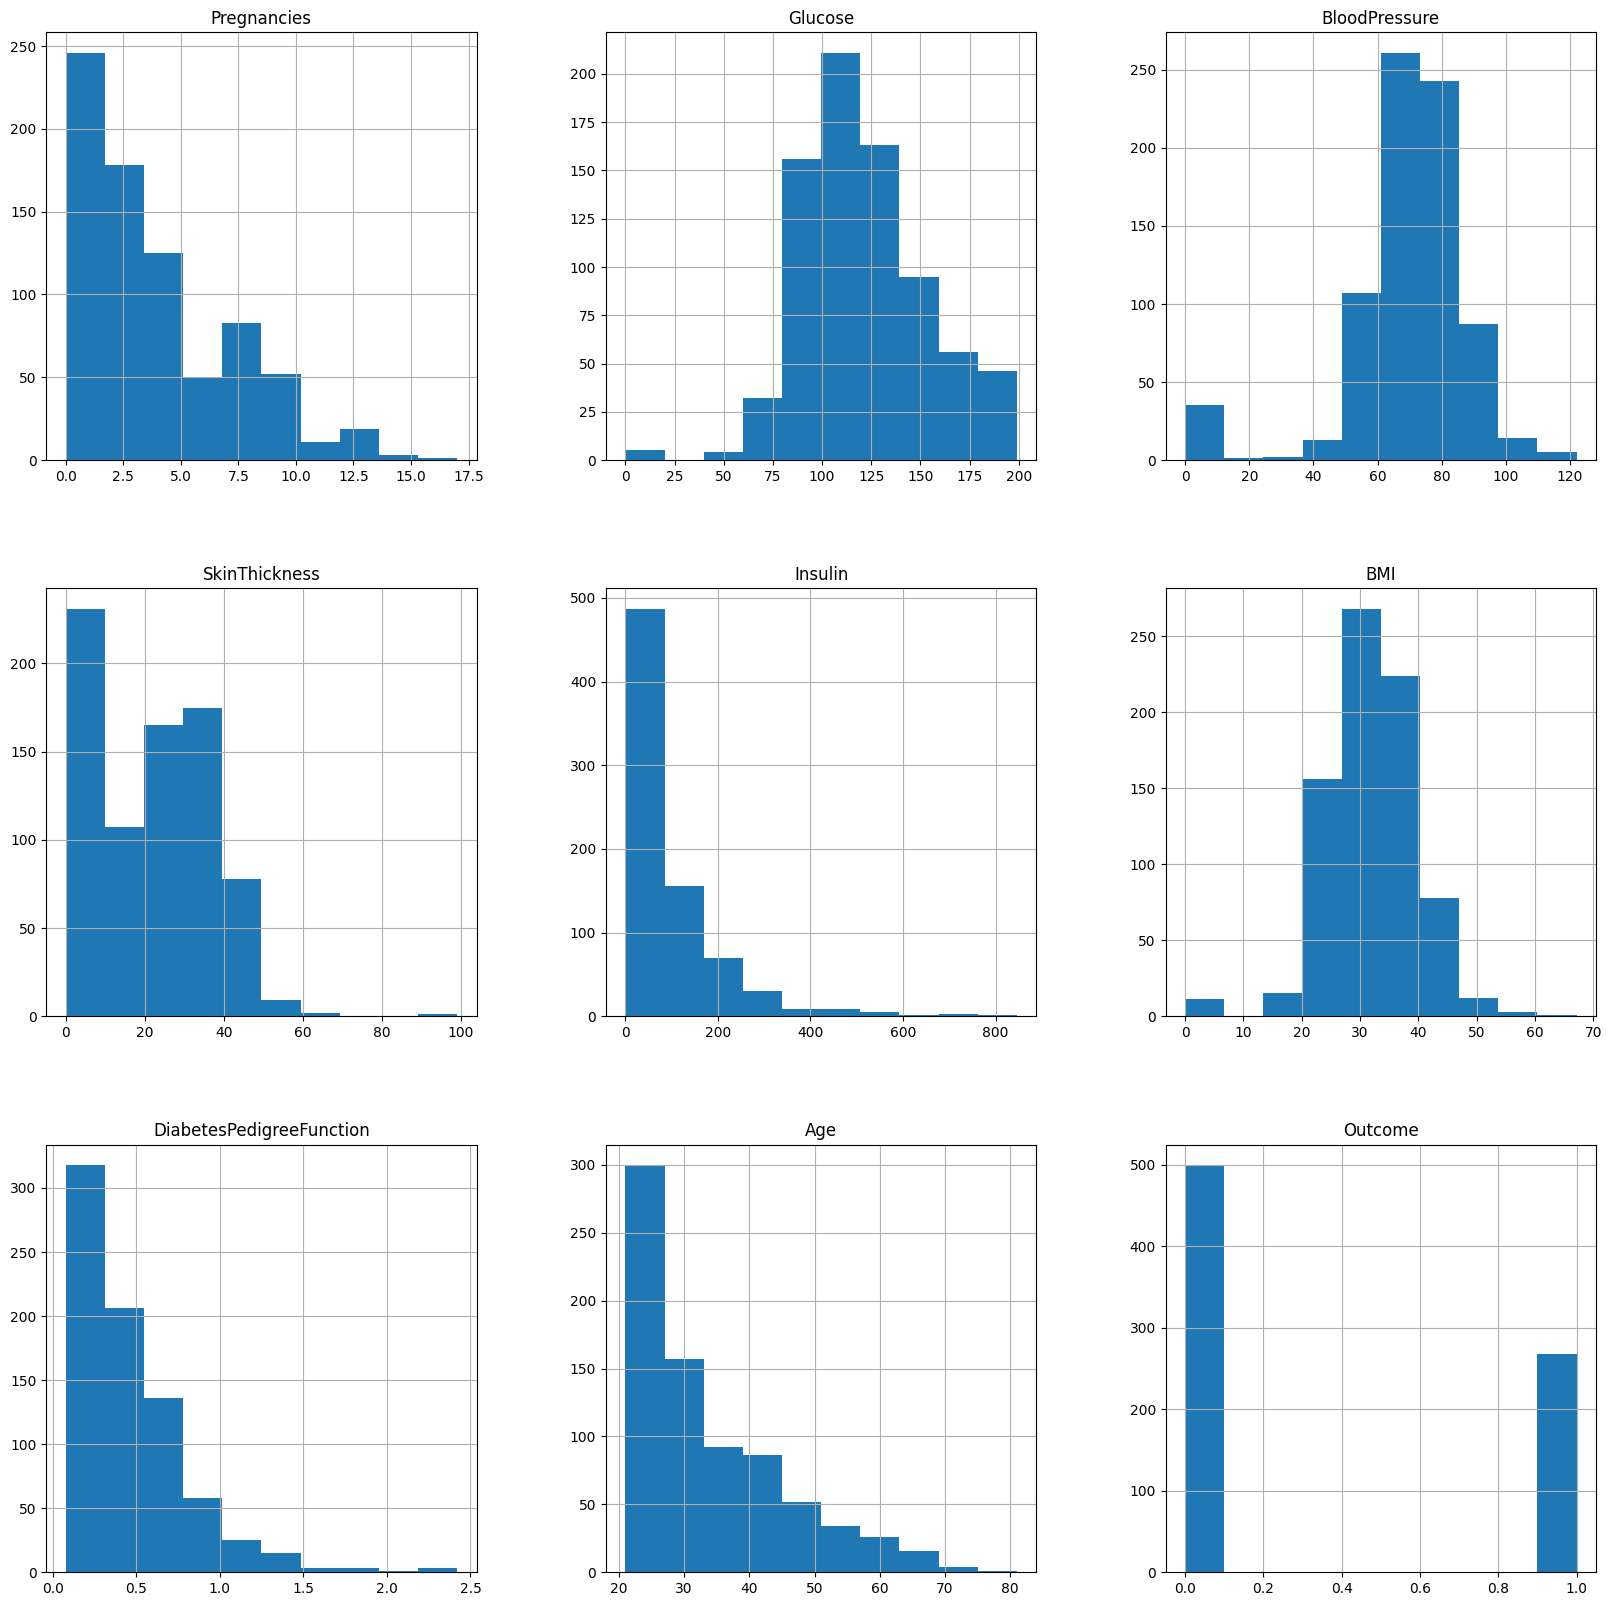

In [865]:
df.hist(figsize = (20,20))

<Axes: >

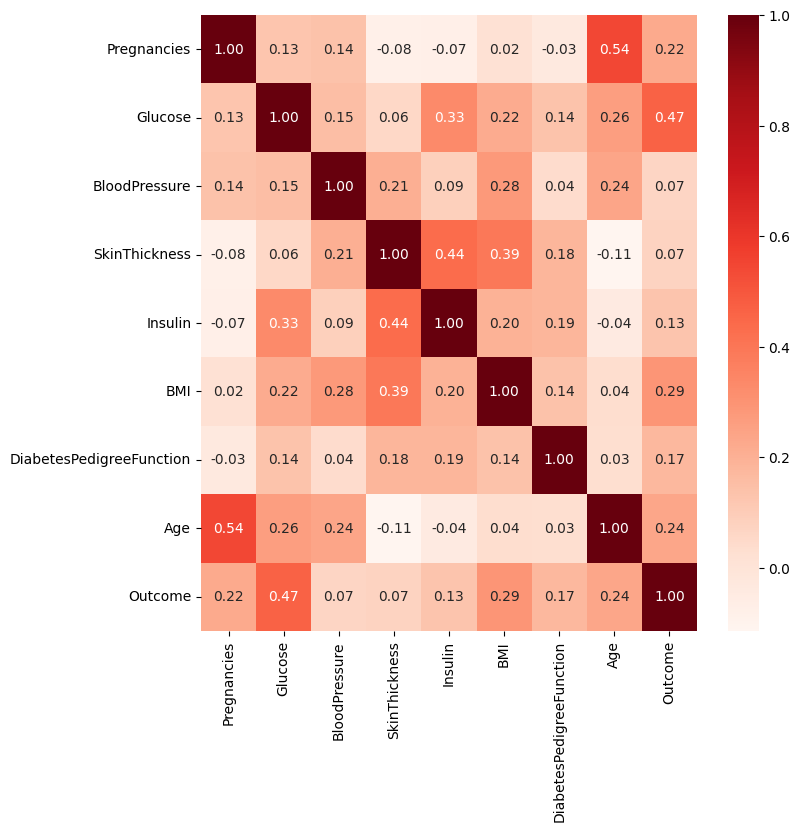

In [866]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot =True,fmt='.2f',cmap='Reds')

# **Observations**

- From the above visualization it is clearly visible that data is completely inbalanced. Infact that no of patients who are diabetic is half of the no of patients who are non-diabetic.

-  from the above correlation map we can see that there is high correlation between outcome and (Glucose,BMI), skin thickness and Insulin.

# **Feature Engineering**

In [867]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [868]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']] =df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NAN)

In [869]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [870]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [871]:
# Replacing NaN with mean values
df["Glucose"].fillna(df["Glucose"].mean(), inplace = True)
df["BloodPressure"].fillna(df["BloodPressure"].mean(), inplace = True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace = True)
df["Insulin"].fillna(df["Insulin"].mean(), inplace = True)
df["BMI"].fillna(df["BMI"].mean(), inplace = True)

In [872]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.875151                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.400000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [873]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [874]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

**Standard Scaling**

In [875]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
sc=StandardScaler()


# Extract the target variable column
features = df.drop('Outcome',axis=1)

# Remove the target variable column from the dataset
target_variable = df['Outcome']

# Apply standard scaling to the features
scaled_features = sc.fit_transform(features)
scaled_features

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [876]:
# Create a new DataFrame or array combining the scaled features and target variable

df=pd.DataFrame(scaled_features,columns=features.columns)
df['Outcome'] =target_variable

In [877]:
df.head()

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4    -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   

        BMI  DiabetesPedigreeFunction       Age  Outcome  
0  0.166292                  0.468492  1.425995        1  
1 -0.852531                 -0.365061 -0.190672        0  
2 -1.332833                  0.604397 -0.105584        1  
3 -0.634212                 -0.920763 -1.041549        0  
4  1.548980                  5.484909 -0.020496        1

**Test/Train Split**

In [878]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [879]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (Y)
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

y=df[['Outcome']]

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state = 42,stratify = df['Outcome'])

In [880]:
# Checking size:

print('x_train:',x_train.size)

print('x_test:',x_test.size)

print('x:',x.size)


x_train: 4912
x_test: 1232
x: 6144


In [881]:
# Checking size:

print('y_train:',y_train.size)

print('y_test:',y_test.size)

print('y:',y.size)

y_train: 614
y_test: 154
y: 768


In [882]:
# Checking shape:

print('x_train:',x_train.shape)

print('x_test:',x_test.shape)

print('y_train:',y_train.shape)

print('y_test:',y_test.shape)

x_train: (614, 8)
x_test: (154, 8)
y_train: (614, 1)
y_test: (154, 1)


# **Machine learning**

- **Logistic Regression**

In [883]:
# Import necessary libraries for logistic regression model and evaluation.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [884]:
# Create an instance of the LogisticRegression class.
logistic_model = LogisticRegression()

# Train the logistic regression model on the training data.
logistic_model.fit(x_train,y_train)


LogisticRegression()

- **KNN Algorithm**

In [885]:
# Import necessary libraries for K-Nearest Neighbors (KNN) classifier and evaluation.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score


In [886]:
# Create an instance of the K-Nearest Neighbors class.
KNN = KNeighborsClassifier(n_neighbors=5)

# Train the K-Nearest Neighbors model on the training data.
KNN.fit(x_train,y_train)


KNeighborsClassifier()

- **Decision Tree**

In [887]:
# Import necessary libraries for Decision Tree classifier and evaluation.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [888]:
# Create an instance of the Decision Tree class.
decision_tree = DecisionTreeClassifier()

# Train the Decision Tree model on the training data.
decision_tree.fit(x_train,y_train)





DecisionTreeClassifier()

- **Random Forest Algorithm**

In [889]:
# Import necessary libraries for Random Forest classifier and evaluation.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [890]:
# Create an instance of the Random Forest class.
Random_f =RandomForestClassifier(n_estimators=500)


# Train the Random forest model on the training data.
Random_f.fit(x_train,y_train)



RandomForestClassifier(n_estimators=500)

- **SVM Algorithm**

In [891]:
# Import necessary libraries for SVM classifier and evaluation.
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [892]:
# Create an instance of the SVM class.
svm= SVC()

# Train the SVM model on the training data.
svm.fit(x_train,y_train)


SVC()

# **Prediction**

- **Logistic Regression**

In [893]:
# Make predictions on the test data

lr_predict= logistic_model.predict(x_test)

lr_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

- **KNN Algorithm**

In [894]:
KNN_predict= KNN.predict(x_test)

KNN_predict

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

- **Decision Tree**

In [895]:
decision_tree_predict= decision_tree.predict(x_test)

decision_tree_predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

- **Random Forest Algorithm**

In [896]:
Random_predict= Random_f.predict(x_test)

Random_predict

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

- **SVM Algorithm**

In [897]:
svm_predict=svm.predict(x_test)

svm_predict

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# **Evaluating the Prediction**

In [898]:
# Import necessary libraries for model evaluation

from sklearn.metrics import accuracy_score,precision_score, confusion_matrix, classification_report

- **Logistic Regression**

In [899]:
# Calculate the accuracy of the logistic regression model's predictions
lr_accuracy =accuracy_score(y_test,lr_predict)

# Print the accuracy score
print(lr_accuracy)

# Calculate the precision score for the Logistic Regression model's positive predictions
lr_precision = precision_score(y_test, lr_predict,zero_division=0) # The zero_division parameter is set to 0 to handle cases where there are no true positive predictions

# Print the precision score
print("Precision Score",lr_precision)

0.6948051948051948
Precision Score 0.5777777777777777


- **KNN Algorithm**

In [900]:
# Calculate the accuracy of the KNN model's predictions
KNN_accuracy = accuracy_score(y_test,KNN_predict)

# Print the accuracy score
print(KNN_accuracy)

# Calculate the precision score for the KNN model's positive predictions
KNN_precision = precision_score(y_test, KNN_predict,zero_division=0) # The zero_division parameter is set to 0 to handle cases where there are no true positive predictions

# Print the precision score
print("Precision Score",KNN_precision)

0.7402597402597403
Precision Score 0.6346153846153846


- **Decision Tree**

In [901]:
# Calculate the accuracy of the Decision Tree model's predictions
Decision_accuracy =accuracy_score(y_test,decision_tree_predict)

# Print the accuracy score
print(Decision_accuracy)

# Calculate the precision score for the Decision Tree model's positive predictions
DT_precision = precision_score(y_test, decision_tree_predict,zero_division=0) # The zero_division parameter is set to 0 to handle cases where there are no true positive predictions

# Print the precision score
print("Precision Score",DT_precision)

0.7142857142857143
Precision Score 0.6086956521739131


- **Random Forest Algorithm**

In [902]:
# Calculate the accuracy of the Random Forest model's predictions
Random_accuracy =accuracy_score(y_test,Random_predict)

# Print the accuracy score
print(Random_accuracy)


# Calculate the precision score for the Random Forest model's positive predictions
RF_precision = precision_score(y_test, Random_predict,zero_division=0) # The zero_division parameter is set to 0 to handle cases where there are no true positive predictions

# Print the precision score
print("Precision Score",RF_precision)

0.7337662337662337
Precision Score 0.6382978723404256


- **SVM Algorithm**

In [903]:
# Calculate the accuracy of the SVM model's predictions
SVM_accuracy =accuracy_score(y_test,svm_predict)

# Print the accuracy score
print(SVM_accuracy)

# Calculate the precision score for the Random Forest model's positive predictions
SVM_precision = precision_score(y_test, svm_predict,zero_division=0) # The zero_division parameter is set to 0 to handle cases where there are no true positive predictions

# Print the precision score
print("Precision Score",SVM_precision)

0.7402597402597403
Precision Score 0.6590909090909091


#**Accuracy Score**

In [904]:
print("Logistic_Regression_Accuracy:", lr_accuracy*100)
print("Precision Score",lr_precision)
print('--'*25)


print("KNN_Accuracy:", KNN_accuracy*100)
print("Precision Score",KNN_precision)
print('--'*25)

print("D_Tree_Accuracy:", Decision_accuracy*100)
print("Precision Score",DT_precision)
print('--'*25)

print("Random_forest_Accuracy:", Random_accuracy*100)
print("Precision Score",RF_precision)
print('--'*25)

print("SVM_Accuracy:", SVM_accuracy*100)
print("Precision Score",SVM_precision)

Logistic_Regression_Accuracy: 69.48051948051948
Precision Score 0.5777777777777777
--------------------------------------------------
KNN_Accuracy: 74.02597402597402
Precision Score 0.6346153846153846
--------------------------------------------------
D_Tree_Accuracy: 71.42857142857143
Precision Score 0.6086956521739131
--------------------------------------------------
Random_forest_Accuracy: 73.37662337662337
Precision Score 0.6382978723404256
--------------------------------------------------
SVM_Accuracy: 74.02597402597402
Precision Score 0.6590909090909091


From the above comparison, we can observe that K Nearest neighbors gets the highest accuracy of 80.08 %





In [905]:
# confusion_matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,svm_predict)
cm

array([[85, 15],
       [25, 29]])

In [906]:
# Calculate the precision score for the KNN model's positive predictions
SVM_precision = precision_score(y_test, svm_predict,zero_division=0) # The zero_division parameter is set to 0 to handle cases where there are no true positive predictions

# Print the precision score
print("Precision Score",SVM_precision)

Precision Score 0.6590909090909091


In [907]:
# Generate a classification report to assess the logistic regression model's performance
svm_classification_report = classification_report(y_test, svm_predict,zero_division=0)

# Print the classification report
print("Score Of Classification report",svm_classification_report)

Score Of Classification report               precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



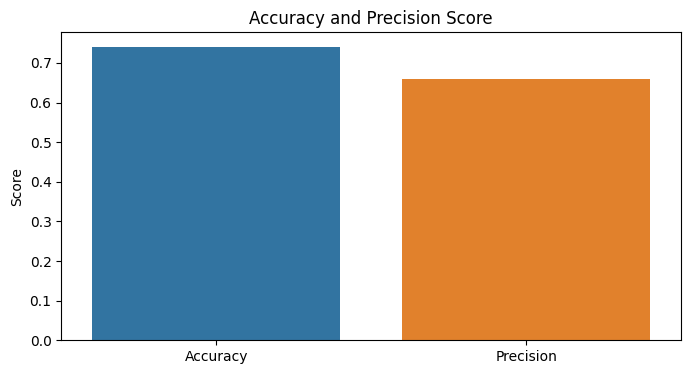

In [908]:
# Set the figure size

plt.figure(figsize=(8,4))
scores ={'Accuracy': SVM_accuracy,'Precision':SVM_precision}
sns.barplot(x=list(scores.keys()),y=list(scores.values()))  # plot a bar plot for accuracy and precision

# Add labels and title to the plot
plt.title('Accuracy and Precision Score')
plt.ylabel('Score')

# Show the plot
plt.show()

<Axes: >

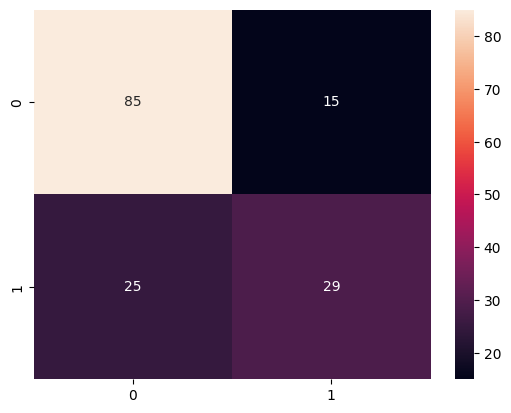

In [909]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

# **Conclusion**

From the above comparison, we can observe that SVM  gets the highest accuracy of 74.02 and Precision Score 65.90%

**Thankyou...**